# ref
#### https://cucmberium.hatenablog.com/entry/2020/06/09/235221

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img_path = r"C:\Users\pshun\Documents\python\tkinter_killingtime\niwatori.jpg"

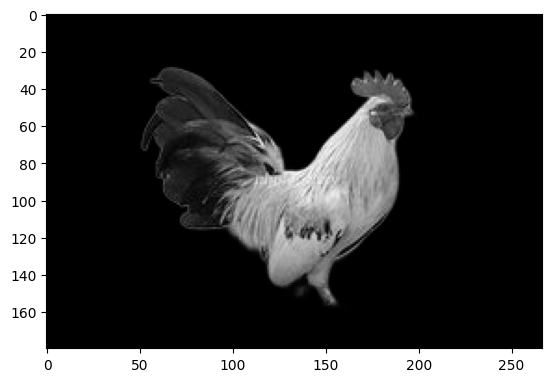

In [20]:
# remove background
import cv2
from rembg import remove
from PIL import Image
import numpy as np

def remove_background(input_image_path):
    # 背景を削除
    try:
        input_image = Image.open(input_image_path)
    except IOError:
        print(f"Error: Cannot open {input_image_path}")
        return

    output_image = remove(input_image)
    return output_image

def apply_mask_to_background(masked_image_path):
    # RGBA画像を読み込み
    rgba_image = cv2.imread(masked_image_path, cv2.IMREAD_UNCHANGED)
    if rgba_image is None:
        print(f"Error: Cannot open {masked_image_path}")
        return

    # アルファチャネルをマスクとして使用
    alpha_channel = rgba_image[:, :, 3]

    # 白い背景画像を作成
    background = np.ones_like(rgba_image, dtype=np.uint8) * 255
    # マスクを適用
    background_masked = cv2.bitwise_and(background, background, mask=alpha_channel)
    return background_masked

img_pil = remove_background(img_path)
img_np = np.array(img_pil)
gray_img = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img, cmap="gray")

C:\Users\pshun\AppData\Local\Temp\ipykernel_35236\3748759993.py:4: RuntimeWarning: invalid value encountered in divide
  curve_img = np.clip(gray_img.astype(np.float32) * 255 / (255 - layer_img), 0, 255).astype(np.uint8) # 覆い焼きカラー
C:\Users\pshun\AppData\Local\Temp\ipykernel_35236\3748759993.py:4: RuntimeWarning: invalid value encountered in cast
  curve_img = np.clip(gray_img.astype(np.float32) * 255 / (255 - layer_img), 0, 255).astype(np.uint8) # 覆い焼きカラー


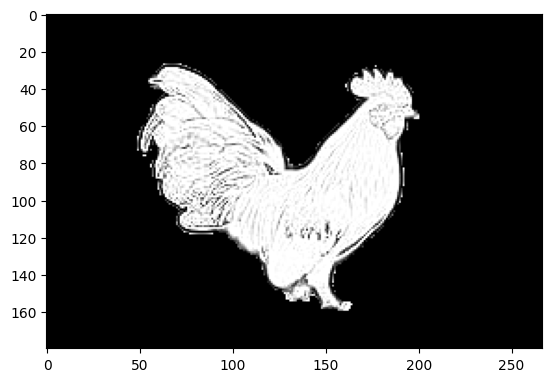

In [21]:
# 覆い焼きカラー
layer_img = 255.0 - gray_img
layer_img = cv2.GaussianBlur(layer_img, (0, 0), 1)
curve_img = np.clip(gray_img.astype(np.float32) * 255 / (255 - layer_img), 0, 255).astype(np.uint8) # 覆い焼きカラー
plt.imshow(curve_img, cmap="gray")

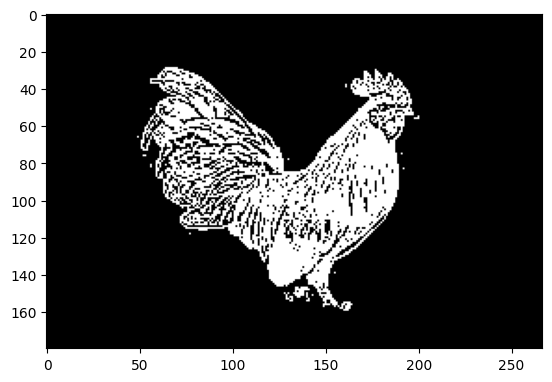

In [22]:
threshold = 240
curve_img[curve_img >= threshold] = 255
curve_img[curve_img < threshold] = 0
plt.imshow(curve_img, cmap="gray")